In [1]:
import numpy as np
import os

def import_data(directory: str) -> None:
    """Load all data to learning from specific directory

    Args:
        directory (str): directory where all data are stored

    Returns:
        np.array: data from simulations in readable form shape (100,100,3) where we have 100 simulations, 100 requests and 3 features (input node, output node, bitrate
        np.array: labels to predictions from simulation in readable form with shape (100,4) where we have 100 simulations and 4 data to predictions (highestSlot, avgHighestSlot, sumOfSlots, avgActiveTransceivers)
    """
    data = []
    results = []

    for i in os.listdir(directory):
        d = np.genfromtxt(f"{directory}/{i}/requests.csv", delimiter=',', skip_header=1, dtype=float)
        data.append(d[:, 1:])
        results.append(np.genfromtxt(f"{directory}/{i}/results.txt", dtype=float, usecols=(1,)))

    return np.array(data), np.array(results)

In [2]:
data, results = import_data("Euro28")

data = data.reshape(100,300)
results = results[:, 1]

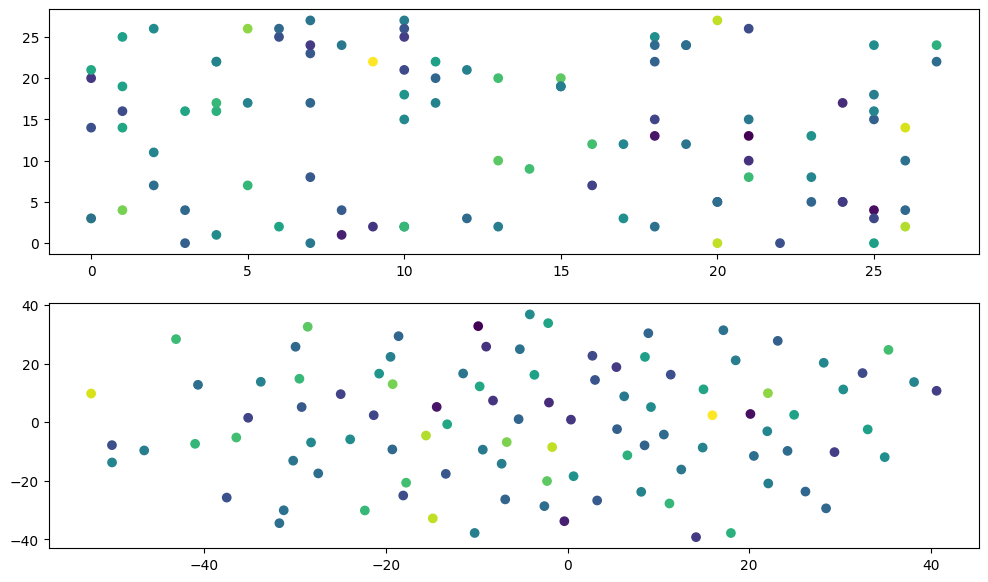

In [29]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

X_t = TSNE(perplexity=15).fit_transform(data)


fig, ax = plt.subplots(2,1, figsize=(12,7))
ax[0].scatter(data[:,0], data[:,1], c=results)
ax[1].scatter(X_t[:,0], X_t[:,1], c=results)

In [27]:
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)
